# Business Problem

The company is facing problems like ride cancellations, incomplete trips, and uneven ride demand at different times. Some rides are cancelled by customers or drivers, which affects income and customer trust. The company also needs to understand fare amounts, payment methods, and customer ratings to improve service quality.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("ncr_ride_bookings.csv")
df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [3]:
df.shape

(150000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [5]:
df.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [6]:
df.isna().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              10500
Avg CTAT                              48000
Cancelled Rides by Customer          139500
Reason for cancelling by Customer    139500
Cancelled Rides by Driver            123000
Driver Cancellation Reason           123000
Incomplete Rides                     141000
Incomplete Rides Reason              141000
Booking Value                         48000
Ride Distance                         48000
Driver Ratings                        57000
Customer Rating                       57000
Payment Method                        48000
dtype: int64

# Data Preprocessing

In [7]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['date', 'time', 'booking_id', 'booking_status', 'customer_id',
       'vehicle_type', 'pickup_location', 'drop_location', 'avg_vtat',
       'avg_ctat', 'cancelled_rides_by_customer',
       'reason_for_cancelling_by_customer', 'cancelled_rides_by_driver',
       'driver_cancellation_reason', 'incomplete_rides',
       'incomplete_rides_reason', 'booking_value', 'ride_distance',
       'driver_ratings', 'customer_rating', 'payment_method'],
      dtype='object')

In [8]:
# Combine columns and change data type

df['datetime']= pd.to_datetime(df['date'] + " " + df['time'])
df['datetime'].dtype

dtype('<M8[ns]')

In [9]:
df.drop(['date', 'time'], axis=1, inplace=True)
df.head(2)

,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,cancelled_rides_by_driver,driver_cancellation_reason,incomplete_rides,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,datetime
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39


# Feature Engineering

In [10]:
df['hour']= df['datetime'].dt.hour
df['day']= df['datetime'].dt.day_name()
df['month']= df['datetime'].dt.month
df.head()

,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,...,incomplete_rides_reason,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,datetime,hour,day,month
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,12,Saturday,3
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,...,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,18,Friday,11
2,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,NaN,NaN,...,NaN,627.0,13.58,4.9,4.9,Debit Card,2024-08-23 08:56:10,8,Friday,8
3,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,NaN,NaN,...,NaN,416.0,34.02,4.6,5.0,UPI,2024-10-21 17:17:25,17,Monday,10
4,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,NaN,NaN,...,NaN,737.0,48.21,4.1,4.3,UPI,2024-09-16 22:08:00,22,Monday,9


In [11]:
# Categories the data based on hours

df['shift']= pd.cut(df['hour'], bins=[0,10,15,19,24], 
        labels= ['Morning', 'Afternoon','Evening','Night'],right=False) # to include left value
df.head(2)

,booking_id,booking_status,customer_id,vehicle_type,pickup_location,drop_location,avg_vtat,avg_ctat,cancelled_rides_by_customer,reason_for_cancelling_by_customer,...,booking_value,ride_distance,driver_ratings,customer_rating,payment_method,datetime,hour,day,month,shift
0,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2024-03-23 12:29:38,12,Saturday,3,Afternoon
1,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,NaN,NaN,...,237.0,5.73,NaN,NaN,UPI,2024-11-29 18:01:39,18,Friday,11,Evening


In [12]:
# Handle null values

df['avg_vtat']= df['avg_vtat'].fillna( df['avg_vtat'].mean())
df['avg_ctat']= df['avg_ctat'].fillna( df['avg_ctat'].mean())

In [13]:
df['cancelled_rides_by_customer']=  df['cancelled_rides_by_customer'].fillna(0)
df['reason_for_cancelling_by_customer']= df['reason_for_cancelling_by_customer'].fillna("Not Cancelled")

df['cancelled_rides_by_driver']=  df['cancelled_rides_by_driver'].fillna(0)
df['driver_cancellation_reason']=  df['driver_cancellation_reason'].fillna("Not Cancelled")

df['incomplete_rides'] = df['incomplete_rides'].fillna(0)
df['incomplete_rides_reason']= df['incomplete_rides_reason'].fillna("Completed")

df['booking_value']= df['booking_value'].fillna(df['booking_value'].median())
df['ride_distance']= df['ride_distance'].fillna(df['ride_distance'].median())

df['driver_ratings']= df['driver_ratings'].fillna(df['driver_ratings'].mean())
df['customer_rating']= df['customer_rating'].fillna(df['customer_rating'].mean())

df['payment_method']= df['payment_method'].fillna(df['payment_method'].mode()[0])

In [14]:
df.isna().sum()

booking_id                           0
booking_status                       0
customer_id                          0
vehicle_type                         0
pickup_location                      0
drop_location                        0
avg_vtat                             0
avg_ctat                             0
cancelled_rides_by_customer          0
reason_for_cancelling_by_customer    0
cancelled_rides_by_driver            0
driver_cancellation_reason           0
incomplete_rides                     0
incomplete_rides_reason              0
booking_value                        0
ride_distance                        0
driver_ratings                       0
customer_rating                      0
payment_method                       0
datetime                             0
hour                                 0
day                                  0
month                                0
shift                                0
dtype: int64

# EDA (Exploratory Data Analysis)

In [15]:
df['booking_status'] = df['booking_status'].apply(
    lambda x: 'Completed' if x == 'Completed'
    else 'Cancelled' if x in ['Cancelled by Driver', 'Cancelled by Customer']
    else 'Incomplete'
)

# Booking outcome 

In [16]:
df['booking_status'].value_counts()

booking_status
Completed     93000
Cancelled     37500
Incomplete    19500
Name: count, dtype: int64

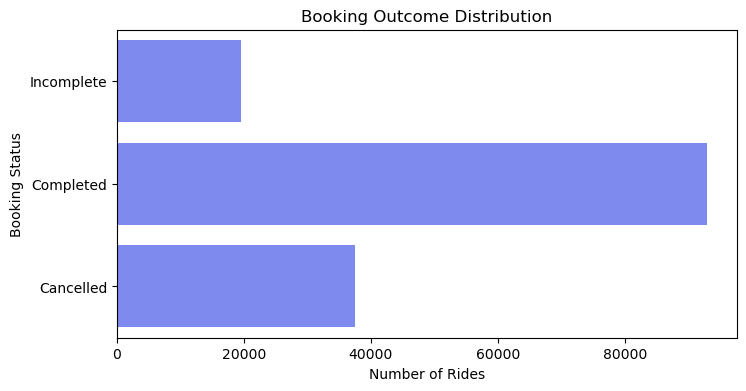

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(df['booking_status'], color='#6C7BFF')
plt.title('Booking Outcome Distribution')
plt.ylabel('Booking Status')
plt.xlabel('Number of Rides')
plt.show()

# Cancellation analysis

In [18]:
cancel_sum= df[['cancelled_rides_by_customer','cancelled_rides_by_driver']].sum()
cancel_sum

cancelled_rides_by_customer    10500.0
cancelled_rides_by_driver      27000.0
dtype: float64

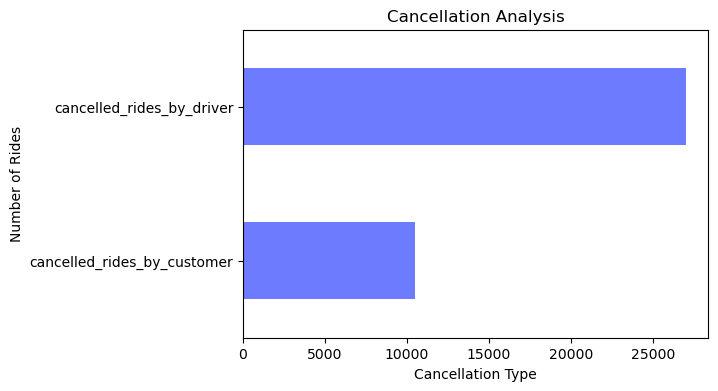

In [19]:
cancel_sum.plot(kind='barh', figsize=(6,4),color='#6C7BFF')
plt.title('Cancellation Analysis')
plt.xlabel('Cancellation Type')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)
plt.show()

# Time-based analysis

# Rides by Month

In [20]:
df['month'].value_counts()

month
7     12897
1     12861
5     12778
3     12719
10    12651
8     12636
6     12440
11    12394
12    12250
9     12248
4     12199
2     11927
Name: count, dtype: int64

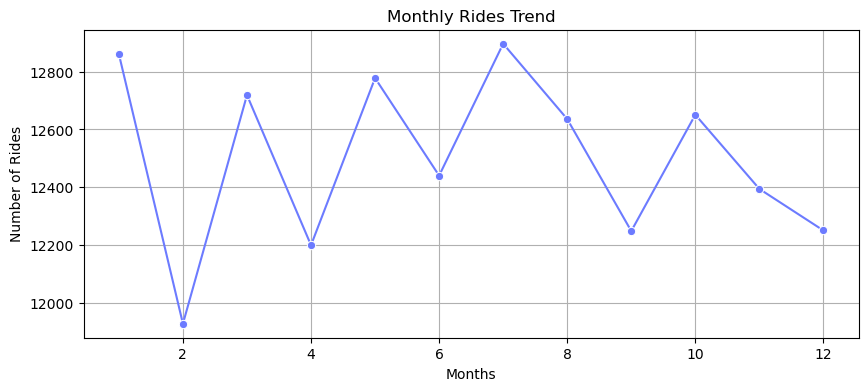

In [21]:
monthly= df.groupby('month').size()

plt.figure(figsize=(10,4))
sns.lineplot(data=monthly,color='#6C7BFF',marker='o')
plt.title('Monthly Rides Trend')
plt.ylabel('Number of Rides')
plt.xlabel('Months')
plt.grid()
plt.show()

# Rides by days

In [22]:
df['day'].value_counts()

day
Monday       21644
Saturday     21542
Wednesday    21413
Sunday       21398
Friday       21397
Tuesday      21391
Thursday     21215
Name: count, dtype: int64

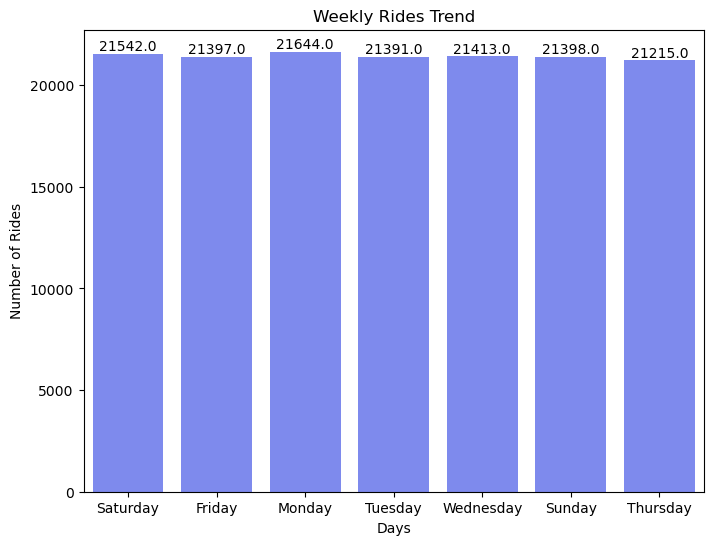

In [23]:
plt.figure(figsize=(8,6))
ax=sns.countplot(x=df['day'],color='#6C7BFF')
plt.title('Weekly Rides Trend')
plt.xlabel('Days')
plt.ylabel('Number of Rides')

# To add labels
for p in ax.patches:
    ax.annotate(
        p.get_height(),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom'
    )

# Rides by Hour

In [24]:
df['hour'].value_counts()

hour
18    12397
19    11047
17    11044
16     9633
20     9630
10     9577
11     8390
9      8234
15     8202
21     8103
14     7031
12     7006
8      6861
13     5470
7      5450
22     5441
6      4160
5      2786
23     2762
3      1383
0      1373
1      1360
2      1339
4      1321
Name: count, dtype: int64

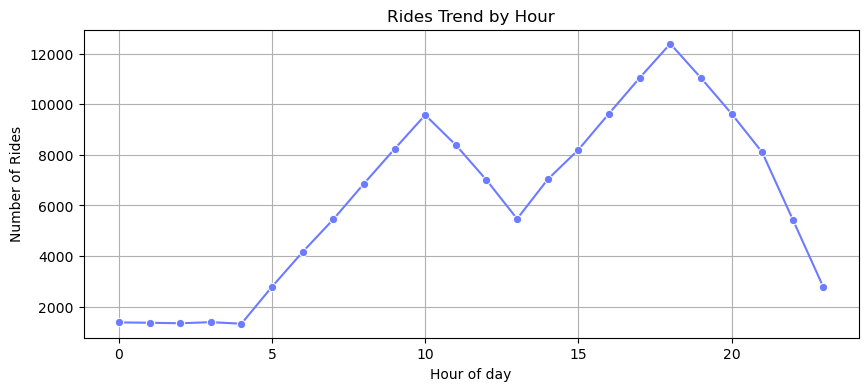

In [25]:
hourly = df.groupby('hour').size()

plt.figure(figsize=(10,4))
sns.lineplot(data=hourly,color='#6C7BFF',marker='o')
plt.title('Rides Trend by Hour')
plt.ylabel('Number of Rides')
plt.xlabel('Hour of day')
plt.grid()
plt.show()

# Vehicle Type Analysis

In [26]:
df['vehicle_type'].value_counts()

vehicle_type
Auto             37419
Go Mini          29806
Go Sedan         27141
Bike             22517
Premier Sedan    18111
eBike            10557
Uber XL           4449
Name: count, dtype: int64

Text(0.5, 0, 'Vehicle type')

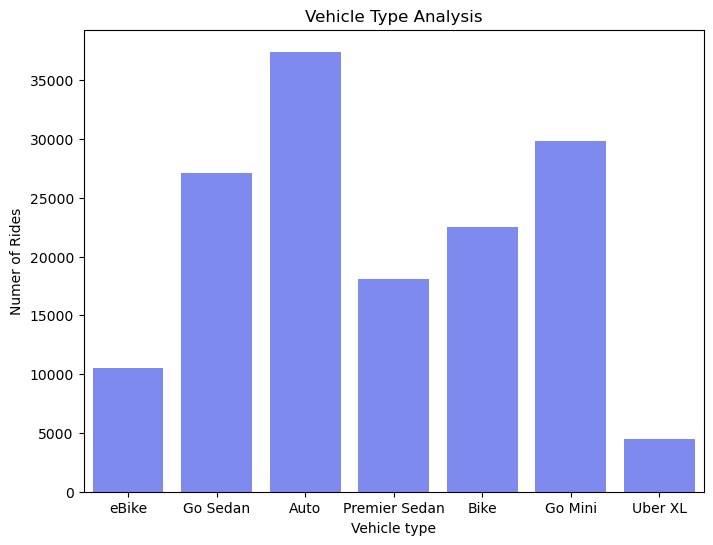

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(x= df['vehicle_type'],color='#6C7BFF')
plt.title('Vehicle Type Analysis')
plt.ylabel('Numer of Rides')
plt.xlabel('Vehicle type')

# Bookings by shift

In [28]:
df['shift'].value_counts()

shift
Evening      41276
Afternoon    37474
Night        36983
Morning      34267
Name: count, dtype: int64

In [29]:
import plotly.express as px

shift_counts = df['shift'].value_counts().reset_index()
shift_counts.columns = ['Shift', 'Bookings']

fig = px.bar(
    shift_counts,
    x='Shift',
    y='Bookings',
    title='Bookings by Shift'
)

fig.update_traces(marker_color='#6C7BFF')
fig.show()

# Avergae Cancellations by shift

In [30]:
cancel_customer= df.groupby('shift')['cancelled_rides_by_customer'].mean().reset_index()
cancel_driver= df.groupby('shift')['cancelled_rides_by_driver'].mean().reset_index()

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=(
        'Avg Customer Cancellations by Shift',
        'Avg Driver Cancellations by Shift'
    )
)

fig.add_trace(
    go.Bar(
        x=cancel_customer['shift'],
        y=cancel_customer['cancelled_rides_by_customer']
    ),
    row=1, col=1
)

fig.add_trace(
    go.Bar(
        x=cancel_driver['shift'],
        y=cancel_driver['cancelled_rides_by_driver'],
        marker_color="#293EB8"
    ),
    row=1, col=2
)

fig.update_layout(
    title='Average Cancellations by Shift',
    showlegend=False
)

fig.show()

# Revenue by time

In [32]:
df.groupby('hour')['booking_value'].mean()
df.groupby('shift')['booking_value'].mean()

shift
Morning      479.821140
Afternoon    476.980093
Evening      478.532561
Night        477.243328
Name: booking_value, dtype: float64

In [33]:
import plotly.express as px

rev_shift = df.groupby('shift')['booking_value'].mean().reset_index()

fig = px.bar(
    rev_shift,
    x='shift',
    y='booking_value',
    title='Average Revenue per Ride by Shift',
    labels={'booking_value': 'Average Revenue (USD)', 'shift': 'Shift'},
    text='booking_value'
)

fig.update_traces(texttemplate='$%{text:.2f}')
fig.show()

In [34]:
rev_hour = df.groupby('hour')['booking_value'].mean().reset_index()

fig = px.line(
    rev_hour,
    x='hour',
    y='booking_value',
    title='Average Revenue per Ride by Hour',
    labels={'booking_value': 'Average Revenue (USD)', 'hour': 'Hour'},
    markers=True
)

fig.show()

# Distance & Fare Analysis

In [35]:
correlation = df[['ride_distance','booking_value']].corr()

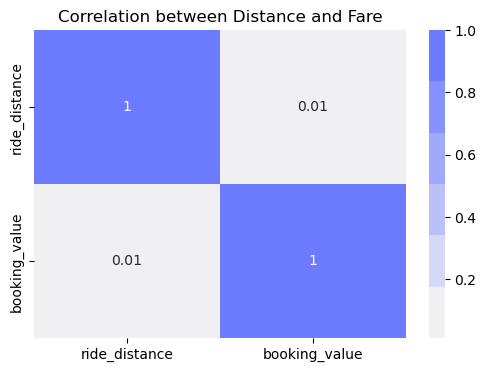

In [36]:
custom_cmap = sns.light_palette('#6C7BFF')

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True,cmap= custom_cmap)
plt.title('Correlation between Distance and Fare')
plt.show()

# Average fare per km

In [37]:
(df['booking_value'] / df['ride_distance']).median()

17.45362563237774

# Ratings Analysis

In [38]:
df['driver_ratings'].value_counts().sort_index()

driver_ratings
3.000000      745
3.100000     1459
3.200000     1538
3.300000     1461
3.400000     1491
3.500000      748
3.600000     2026
3.700000     3790
3.800000     3848
3.900000     3915
4.000000     1995
4.100000     6966
4.200000    13841
4.230992    57000
4.300000    14081
4.400000     7018
4.500000     4634
4.600000     9368
4.700000     4678
4.800000     2328
4.900000     4705
5.000000     2365
Name: count, dtype: int64

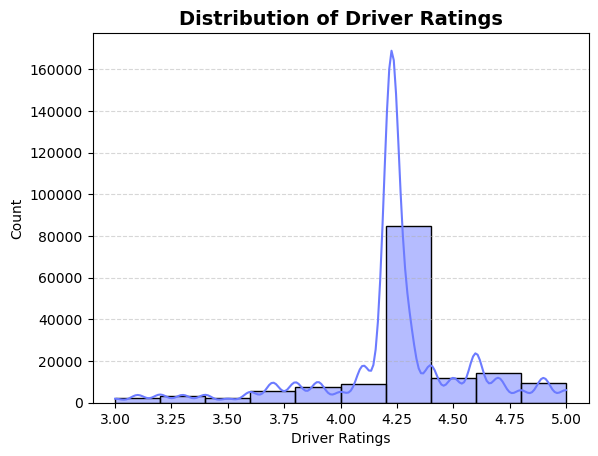

In [39]:
sns.histplot( df['driver_ratings'], bins=10,kde=True,edgecolor='black',color='#6C7BFF')
plt.title('Distribution of Driver Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Driver Ratings')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [40]:
df['customer_rating'].value_counts().sort_index()

customer_rating
3.000000      468
3.100000     1008
3.200000      881
3.300000      900
3.400000      928
3.500000      443
3.600000     1194
3.700000     2354
3.800000     2357
3.900000     2370
4.000000     1185
4.100000     5396
4.200000    10697
4.300000    10995
4.400000     5279
4.404584    57000
4.500000     5890
4.600000    11533
4.700000     5763
4.800000     5880
4.900000    11642
5.000000     5837
Name: count, dtype: int64

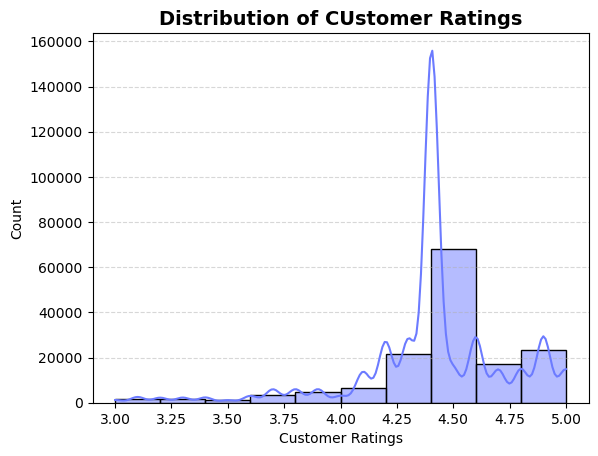

In [41]:
sns.histplot( df['customer_rating'], bins=10,kde=True,edgecolor='black',color='#6C7BFF')
plt.title('Distribution of CUstomer Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Customer Ratings')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Payment Method Analysis

In [42]:
df['payment_method'].value_counts(normalize=True) * 100

payment_method
UPI            62.606000
Cash           16.911333
Uber Wallet     8.184000
Credit Card     6.806000
Debit Card      5.492667
Name: proportion, dtype: float64

In [43]:
pay_pct = df['payment_method'].value_counts(normalize=True).mul(100).reset_index()
pay_pct.columns = ['Payment Method', 'Percentage']

px.pie(
    pay_pct,
    names='Payment Method',
    values='Percentage',
    title='Payment Method Share',
).show()

# Incomplete Rides

In [44]:
incomplete_ride= df[df['incomplete_rides']==1]['incomplete_rides_reason'].value_counts().reset_index()
incomplete_ride

,incomplete_rides_reason,count
0,Customer Demand,3040
1,Vehicle Breakdown,3012
2,Other Issue,2948


In [45]:
incomplete_ride.columns = ['Reason', 'Count']

fig = px.bar(
    incomplete_ride,
    x='Reason',
    y='Count',
    title='Incomplete Ride Reasons'
)

fig.show()

# Cancellation Reason Analysis

# By Customers

In [46]:
reason1= df[df['cancelled_rides_by_customer']==1]['reason_for_cancelling_by_customer'].value_counts().reset_index()
reason1

,reason_for_cancelling_by_customer,count
0,Wrong Address,2362
1,Change of plans,2353
2,Driver is not moving towards pickup location,2335
3,Driver asked to cancel,2295
4,AC is not working,1155


In [47]:
reason1.columns=[ 'Reason by Customer','Count']

fig = px.bar(
    reason1,
    x='Reason by Customer',
    y='Count',
    title='Reasons For Cancelling by Customer'
)

fig.show()

# By Drivers

In [48]:
reason2= df[df['cancelled_rides_by_driver']==1]['driver_cancellation_reason'].value_counts().reset_index()
reason2

,driver_cancellation_reason,count
0,Customer related issue,6837
1,The customer was coughing/sick,6751
2,Personal & Car related issues,6726
3,More than permitted people in there,6686


In [49]:
reason2.columns=[ 'Reason by Driver','Count']

fig = px.bar(
    reason2,
    x='Reason by Driver',
    y='Count',
    title='Reasons For Cancelling by Driver'
)

fig.show()

# Save as CSV

In [50]:
df.to_csv('uber_cleaned_eda.csv', index=False)

# Business Solution

By analyzing the booking data, the company can:

- Find why and when rides get cancelled

- Understand busy and low-demand times

- Improve driver availability and ride completion

- Check if fares are fair compared to distance

- Improve customer satisfaction using ratings

- Promote popular and smooth payment methods

Using these insights, the company can reduce cancellations, increase completed rides, improve customer experience, and grow revenue.